In [1]:
import healpy as hp
import numpy  as np
from scipy.stats import zscore

%matplotlib inline

# Extract the HFI 857 GHz and LFI 30 GHz mask columns from the giant HEALPix files
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/LFI_Mask_PointSrc_2048_R2.00/index.html
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_PointSrc_2048_R2.00/index.html

In [2]:
hfi857_mask = hp.read_map('HFI_Mask_PointSrc_2048_R2.00.fits',
                           hdu = 1,
                           field = 5,
                           nest = True)


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


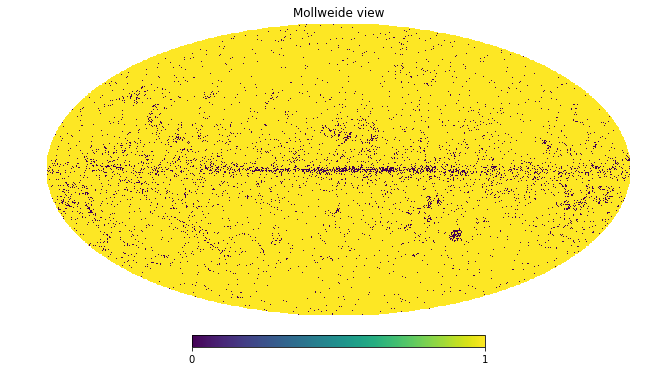

In [3]:
hp.mollview(hfi857_mask, nest=True)

In [4]:
hfi857_mask[hfi857_mask == 0] = hp.UNSEEN

In [5]:
hfi857_mask = hp.ud_grade(hfi857_mask, nside_out = 256, order_in = 'NESTED', order_out = 'NESTED', pess= True )

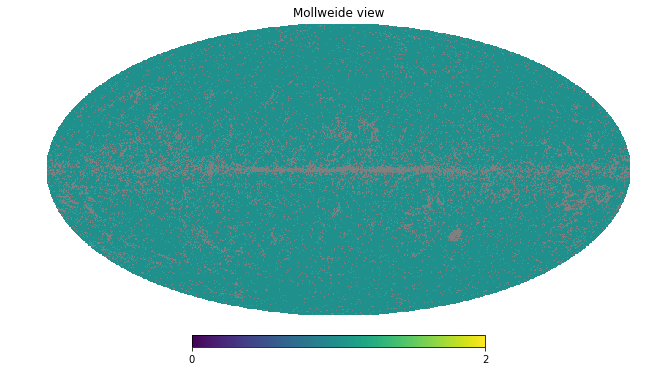

In [6]:
hp.mollview(hfi857_mask, nest=True)

In [7]:
hp.write_map('HFI_857_Mask_PointSrc_256_R2.00.fits', hfi857_mask,  nest=True, overwrite=True)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


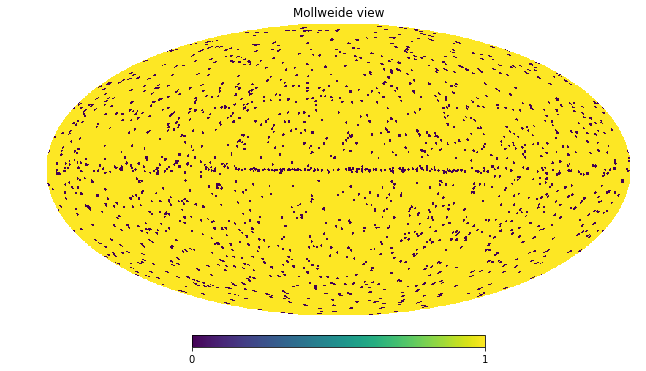

In [8]:
lfi30_mask = hp.read_map('LFI_Mask_PointSrc_2048_R2.00.fits',
                           hdu = 1,
                           field = 0,
                           nest = True)
hp.mollview(lfi30_mask, nest=True)

In [9]:
lfi30_mask[lfi30_mask == 0] = hp.UNSEEN

In [10]:
lfi30_mask = hp.ud_grade(lfi30_mask, nside_out = 256, order_in = 'NESTED', order_out = 'NESTED', pess= True )

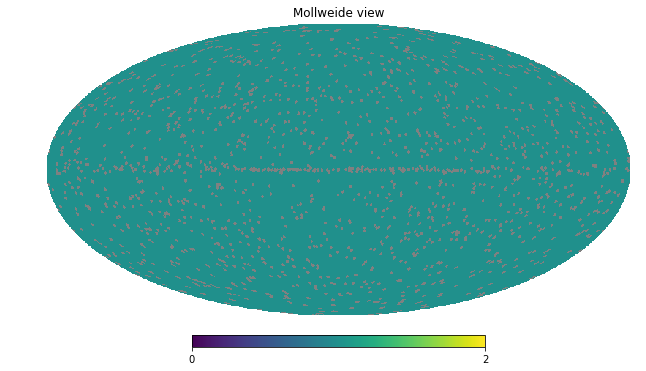

In [11]:
hp.mollview(lfi30_mask, nest=True)

In [12]:
hp.write_map('LFI_30_Mask_PointSrc_256_R2.00.fits', lfi30_mask,  nest=True, overwrite=True)

In [13]:
planck_mask = lfi30_mask.copy()

In [14]:
planck_mask[hfi857_mask==hp.UNSEEN] = hp.UNSEEN

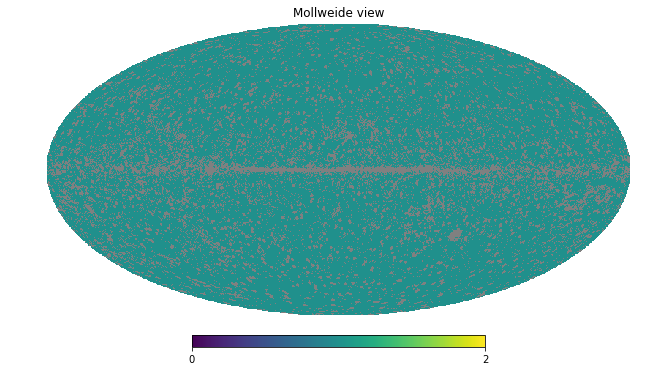

In [15]:
hp.mollview(planck_mask,nest=True)

In [16]:
hp.write_map('Planck_allband_Mask_PointSrc_256_R2.00.fits', planck_mask,  nest=True, overwrite=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


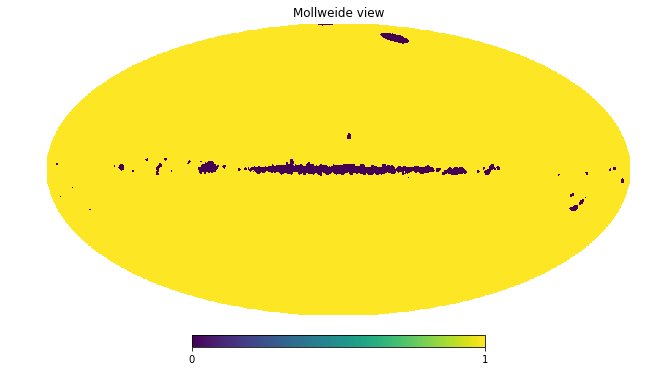

In [17]:
com_gal_mask = hp.read_map('COM_Mask_CMB-PointSrcGalplane-commander-dx11d2-temp-lmax200_0256_R2.03.fits', nest=True)
hp.mollview(com_gal_mask, nest = True)

In [18]:
ecl_lat = hp.read_map('../pixel_coords_map_ring_ecliptic_res8.fits', field = 1, nest=True)
gal_lat = hp.read_map('../pixel_coords_map_ring_galactic_res8.fits', field = 1, nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


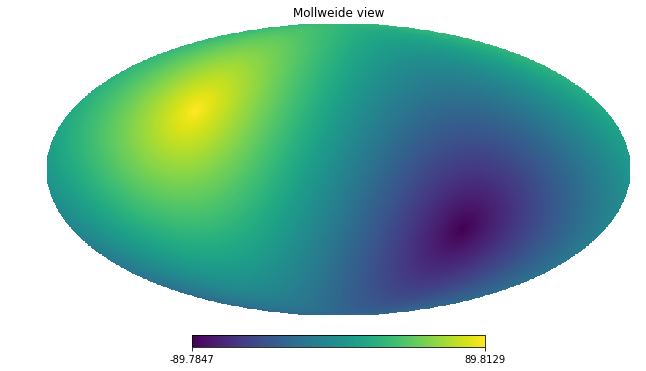

In [19]:
hp.mollview(ecl_lat, nest=True)

In [20]:
mask_ecl = planck_mask.copy()

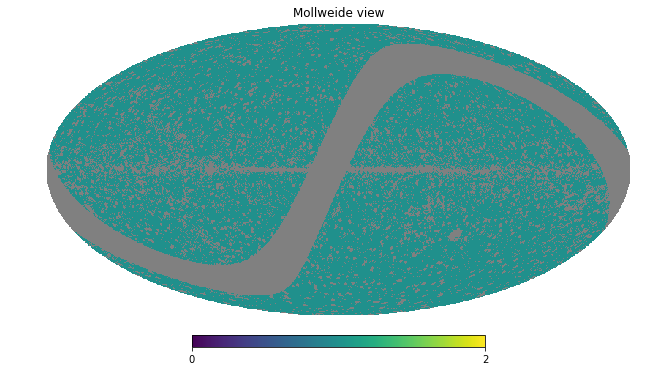

In [21]:
mask_ecl[abs(ecl_lat) < 10] = hp.UNSEEN
hp.mollview(mask_ecl, nest=True)

In [22]:
#mask_gal = planck_mask.copy()
#mask_gal[abs(gal_lat)>30] = hp.UNSEEN
#hp.mollview(mask_gal, nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


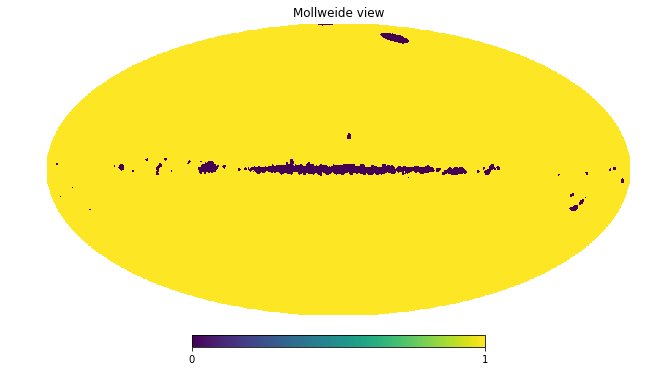

In [23]:
com_galmask = hp.read_map('COM_Mask_CMB-PointSrcGalplane-commander-dx11d2-temp-lmax200_0256_R2.03.fits', nest =True)
hp.mollview(com_galmask, nest=True)

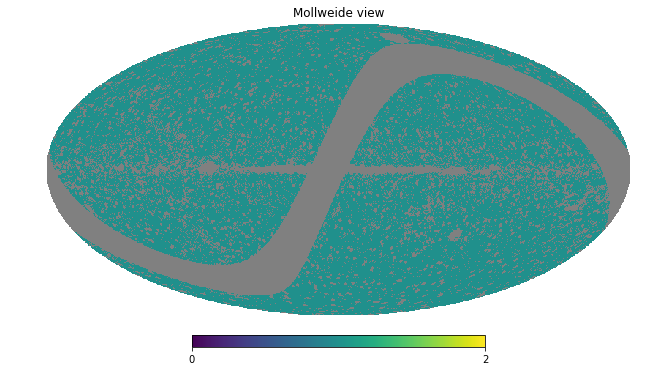

In [74]:
mask_all = mask_ecl.copy()
mask_all[com_galmask==0] = hp.UNSEEN
hp.mollview(mask_all, nest =True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 2.25991
akari_9 std = 0.229041563649


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


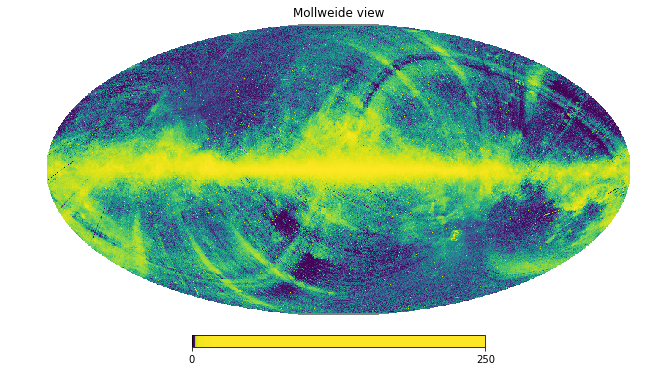

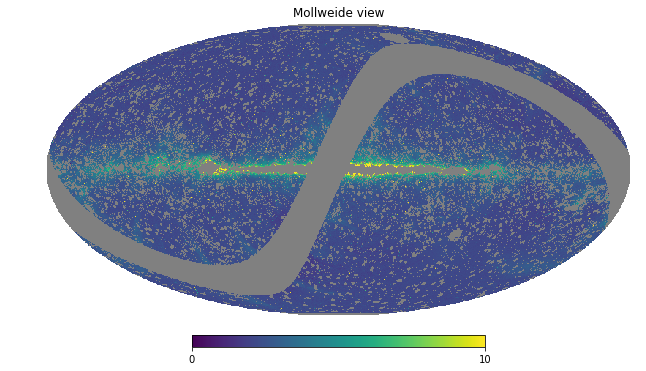

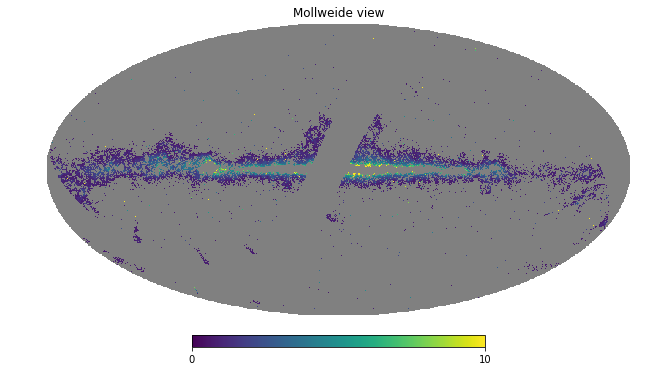

In [89]:
def sigmaMask(band, maskmap, I_cutoff=0.02):
    

    irmap =  hp.read_map('../{}_256_1dres.fits.gz'.format(band), nest=True)
    hp.mollview(irmap, nest=True, min=0, max = 250, norm = 'hist')

    irmap[maskmap==hp.UNSEEN]=hp.UNSEEN
    hp.mollview(irmap, nest=True, min = 0, max = 10)

    irmap = hp.remove_monopole(
        irmap, gal_cut=15,nest=True)

    irmap[irmap == hp.UNSEEN] = np.nan

    irmap_std = np.nanstd(irmap[irmap<I_cutoff])
    
    print band+" "+"std = "+str(irmap_std)
    
    irmap[irmap<3*irmap_std]=np.nan
    irmap[irmap>100*irmap_std]=np.nan
    
    hp.mollview(irmap, nest=True, min=0, max=10)
    
    return irmap

akari9_masked = sigmaMask('akari_9', mask_all)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 0.949791
iras_12 std = 0.0995799366856


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


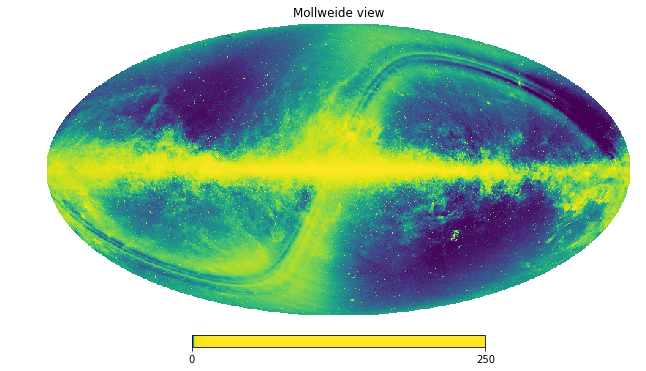

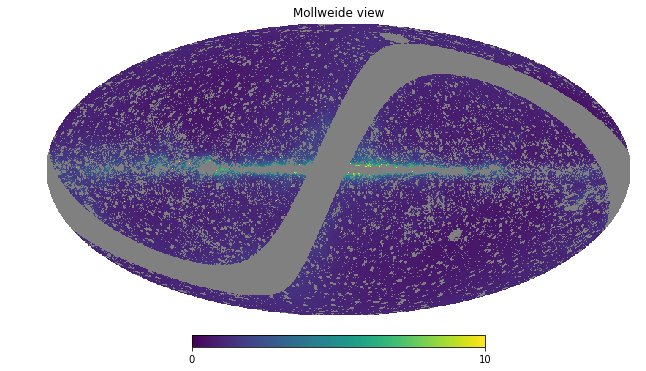

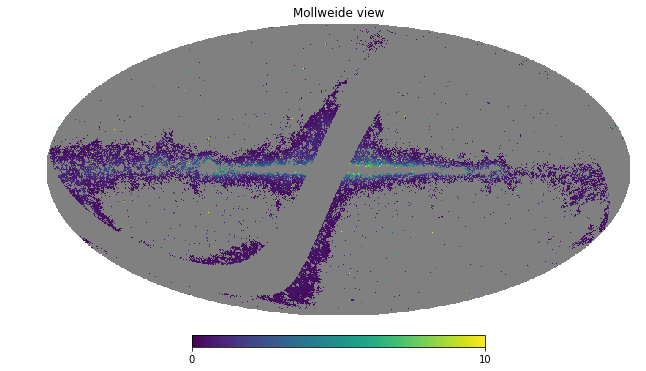

In [80]:
iras12_masked = sigmaMask('iras_12', mask_all)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 5.09169
akari_18 std = 1.09469338312


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


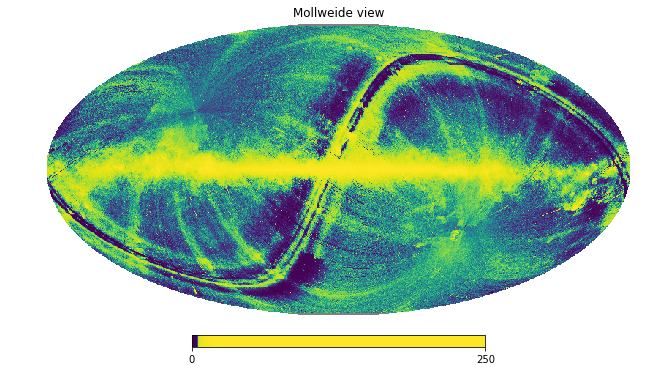

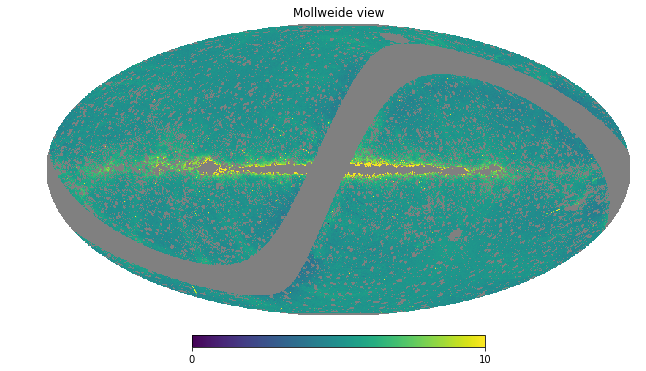

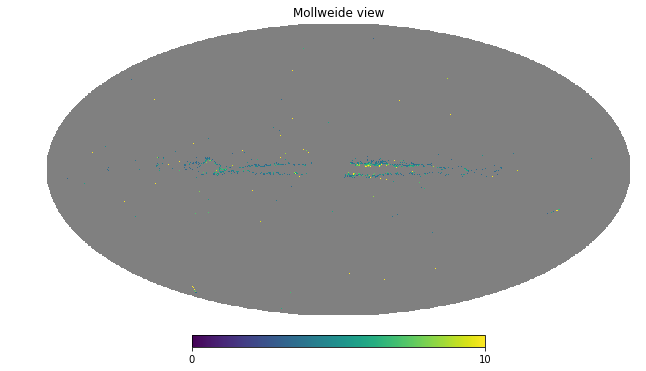

In [87]:
akari18_masked = sigmaMask('akari_18', mask_all, I_cutoff = 0.001)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 1.73575
iras_25 std = 0.136736612038


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


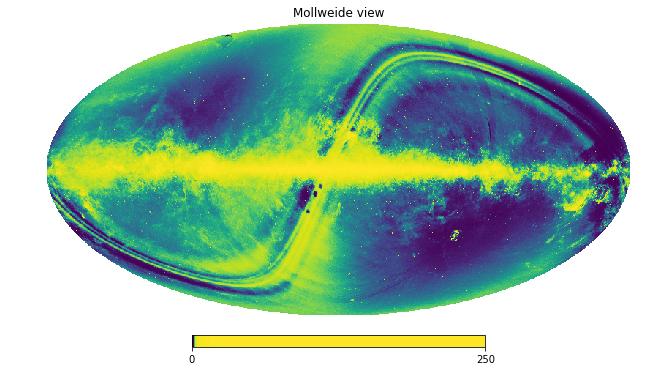

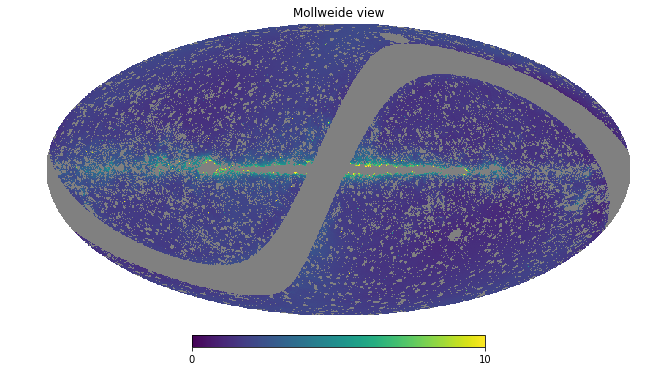

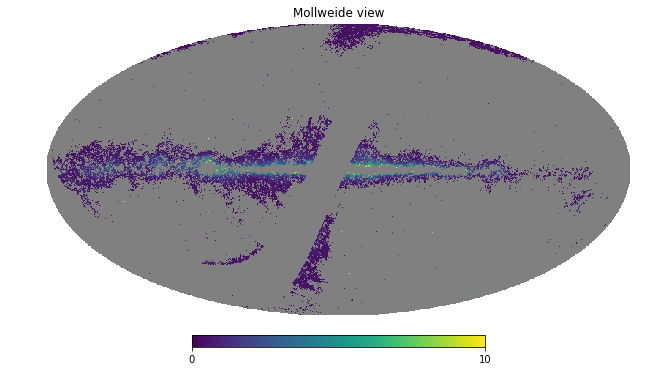

In [81]:
iras25_masked = sigmaMask('iras_25', mask_all)

nan


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [66]:
np.sqrt(np.nanmean((iras12[iras12<0.0001])**2))

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


nan

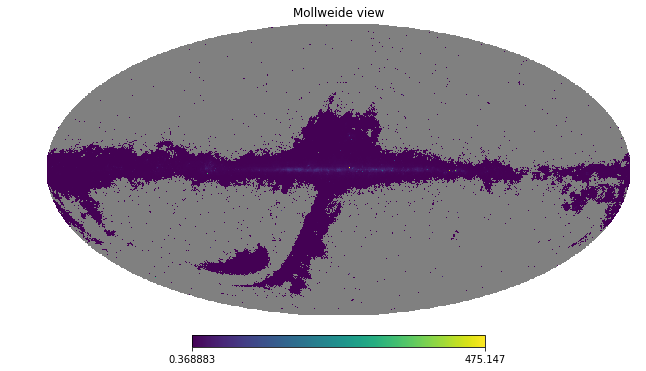

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


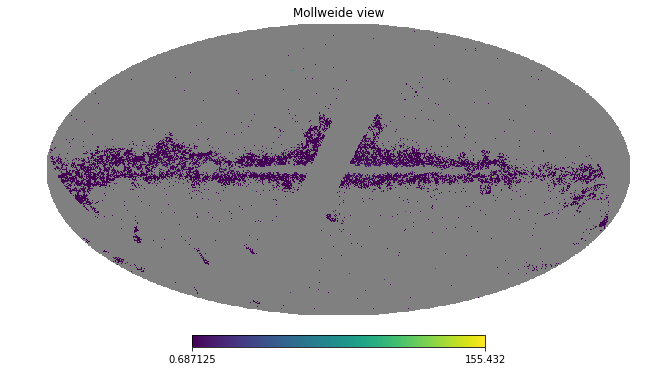

In [32]:
akari9[akari9<3*a9_std]=hp.UNSEEN
hp.mollview(akari9, nest=True)

In [33]:
np.nanmean(akari9)

-1.4566121035098736e+30

In [39]:
mask_all[akari9==hp.UNSEEN] = hp.UNSEEN

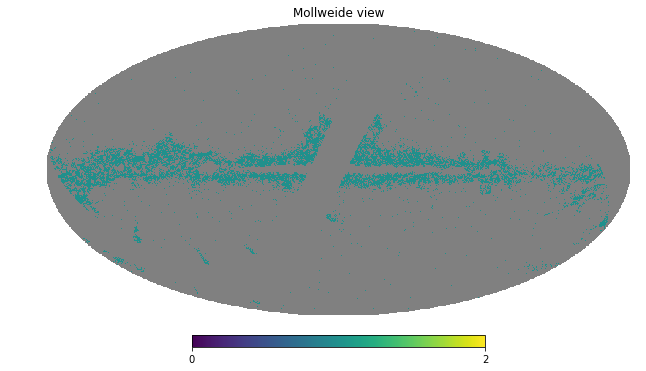

In [40]:
hp.mollview(mask_all, nest=True)

In [41]:
#mask_all[mask_gal==hp.UNSEEN] = hp.UNSEEN

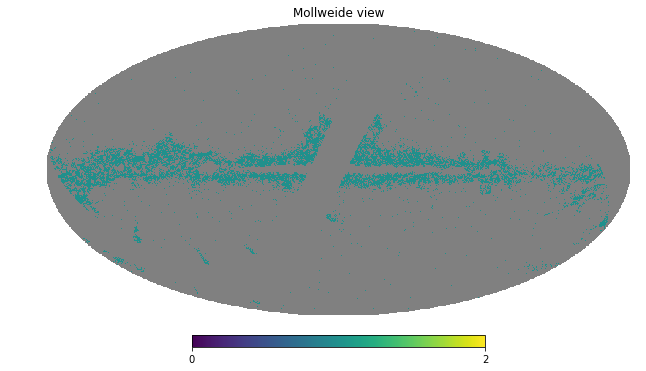

In [42]:
hp.mollview(mask_all, nest=True)

In [43]:
hp.write_map('mask_all.fits', mask_all, nest=True, overwrite=True)